In [2]:
#Importando as bibliotecas
import cv2
import os
import numpy as np

#image configs
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
%matplotlib inline

DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w7 - Geometric Transformations and Image Features\data"

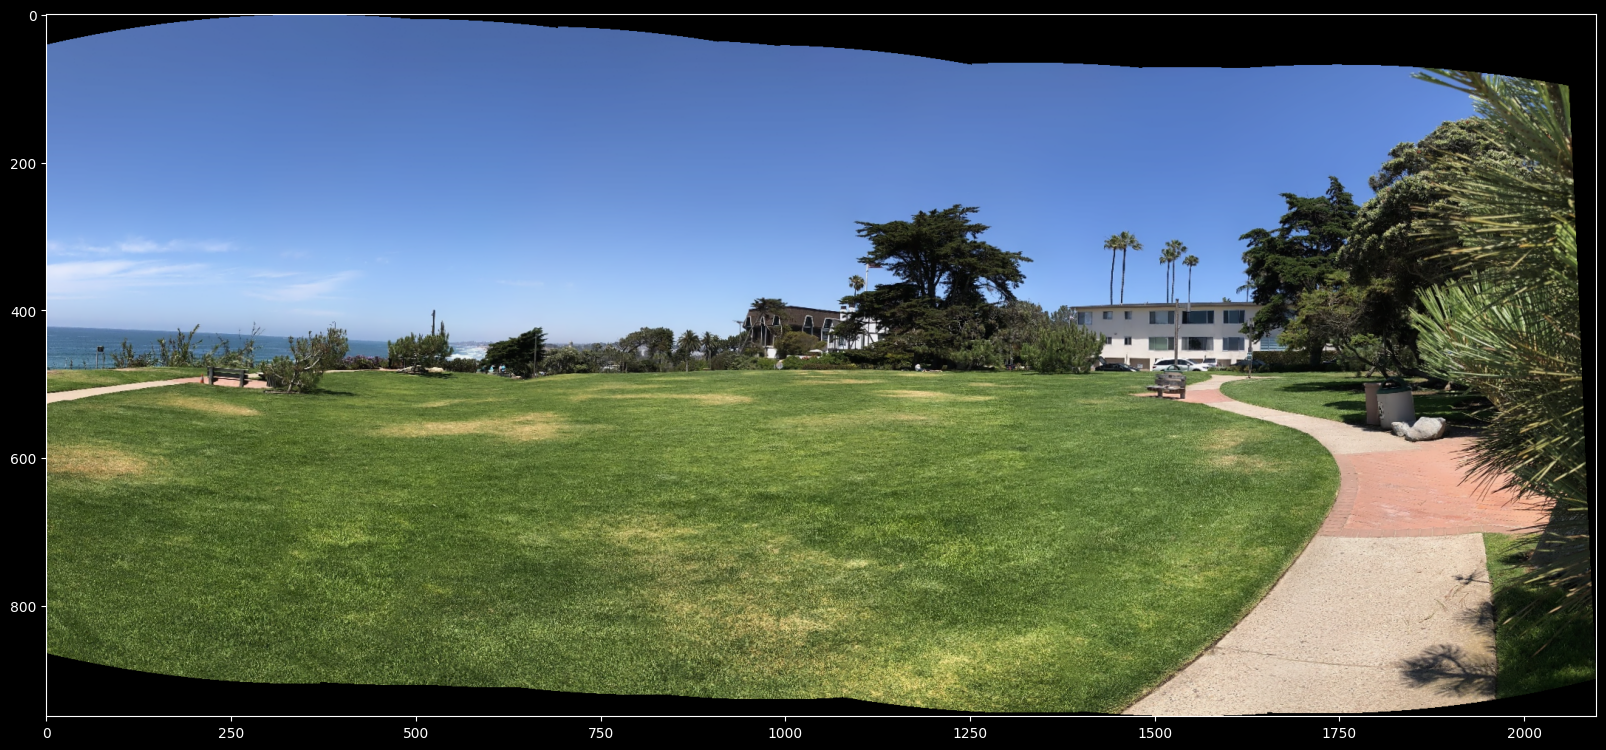

In [4]:
images = []

dirName = "scene"

imagefiles = [DATA_PATH + "/images/{}/".format(dirName) + f for f in os.listdir(DATA_PATH+"/images/"+dirName) if f.endswith(".jpg")]
imagefiles.sort()

destination = "{}_result.png".format(dirName)
plt.figure(figsize=[20,15])
i=1
for filename in imagefiles:
    img = cv2.imread(filename)
    images.append(img)

###
### YOUR CODE HERE
def panorama(images, destination, max_features=500, good_match_percent=0.15):
    num_images = len(images)

    img_list = np.empty((num_images,images[0].shape[0],images[0].shape[1],3), dtype=np.uint8)

    for i in range(num_images):
        img_list[i] = images[i]

    # Criando Stich the imagens
    stitcher = cv2.Stitcher.create()
    status, panorama = stitcher.stitch(img_list)

    # Salvando resultado
    cv2.imwrite(destination, panorama)

    return panorama

result = panorama(images, destination, max_features=500, good_match_percent=0.5)
plt.imshow(result[:,:,::-1])
###


https://en.wikipedia.org/wiki/Panorama
https://en.wikipedia.org/wiki/Image_stitching
https://www.pyimagesearch.com/2018/12/17/image-stitching-with-opencv-and-python/
https://towardsdatascience.com/image-panorama-stitching-with-opencv-2402bde6b46c